In [133]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [67]:
data = pd.read_csv("datasets.csv")

data.head()

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,B365H,B365D,B365A,BSH,BSD,BSA,diff_goals,target
0,24559,Switzerland,Switzerland Super League,2008/2009,1,2008-07-18 00:00:00,BSC Young Boys,FC Basel,1,2,NaN,NaN,NaN,NaN,NaN,NaN,-1,1
1,24560,Switzerland,Switzerland Super League,2008/2009,1,2008-07-19 00:00:00,FC Aarau,FC Sion,3,1,NaN,NaN,NaN,NaN,NaN,NaN,2,1
2,24561,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,FC Luzern,FC Vaduz,1,2,NaN,NaN,NaN,NaN,NaN,NaN,-1,1
3,24562,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,Neuchâtel Xamax,FC Zürich,1,2,NaN,NaN,NaN,NaN,NaN,NaN,-1,1
4,24613,Switzerland,Switzerland Super League,2008/2009,2,2008-07-23 00:00:00,FC Basel,Grasshopper Club Zürich,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1


In [68]:
data.dtypes

id                  int64
country_name       object
league_name        object
season             object
stage               int64
date               object
home_team          object
away_team          object
home_team_goal      int64
away_team_goal      int64
B365H             float64
B365D             float64
B365A             float64
BSH               float64
BSD               float64
BSA               float64
diff_goals          int64
target              int64
dtype: object

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              25979 non-null  int64  
 1   country_name    25979 non-null  object 
 2   league_name     25979 non-null  object 
 3   season          25979 non-null  object 
 4   stage           25979 non-null  int64  
 5   date            25979 non-null  object 
 6   home_team       25979 non-null  object 
 7   away_team       25979 non-null  object 
 8   home_team_goal  25979 non-null  int64  
 9   away_team_goal  25979 non-null  int64  
 10  B365H           22592 non-null  float64
 11  B365D           22592 non-null  float64
 12  B365A           22592 non-null  float64
 13  BSH             14161 non-null  float64
 14  BSD             14161 non-null  float64
 15  BSA             14161 non-null  float64
 16  diff_goals      25979 non-null  int64  
 17  target          25979 non-null 

In [70]:
data.isnull().mean()

id                0.000000
country_name      0.000000
league_name       0.000000
season            0.000000
stage             0.000000
date              0.000000
home_team         0.000000
away_team         0.000000
home_team_goal    0.000000
away_team_goal    0.000000
B365H             0.130375
B365D             0.130375
B365A             0.130375
BSH               0.454906
BSD               0.454906
BSA               0.454906
diff_goals        0.000000
target            0.000000
dtype: float64

<Axes: >

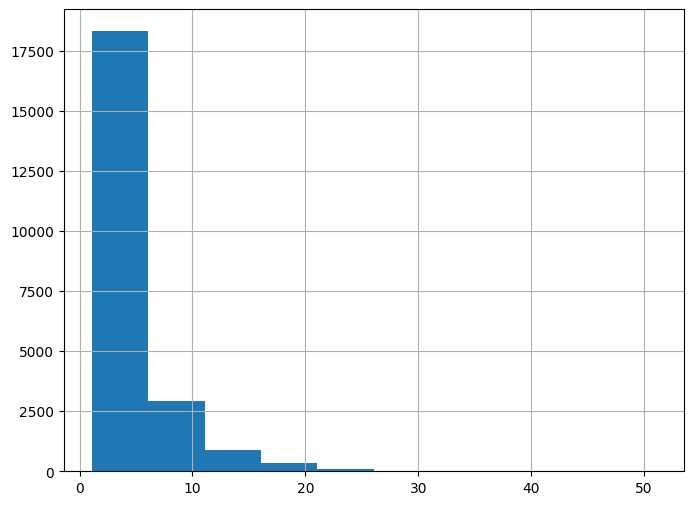

In [71]:
data.B365A.hist()

<Axes: >

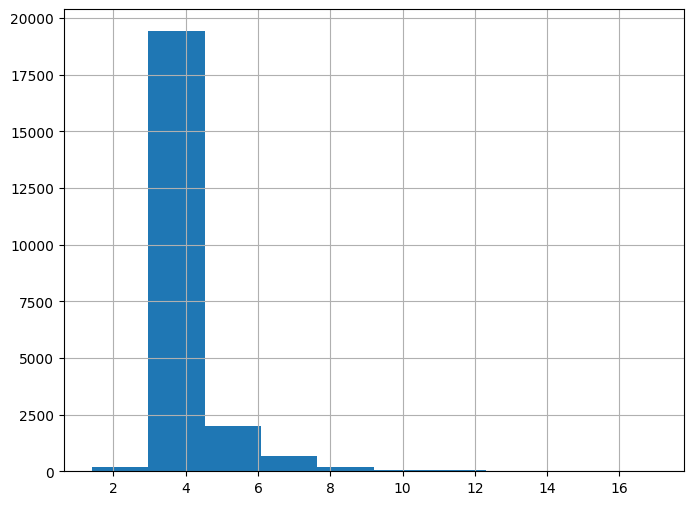

In [72]:
data.B365D.hist()

<Axes: >

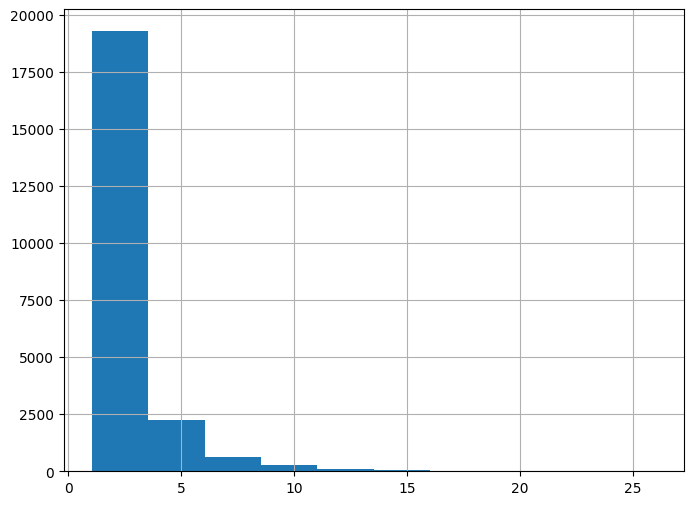

In [73]:
data.B365H.hist()

<Axes: >

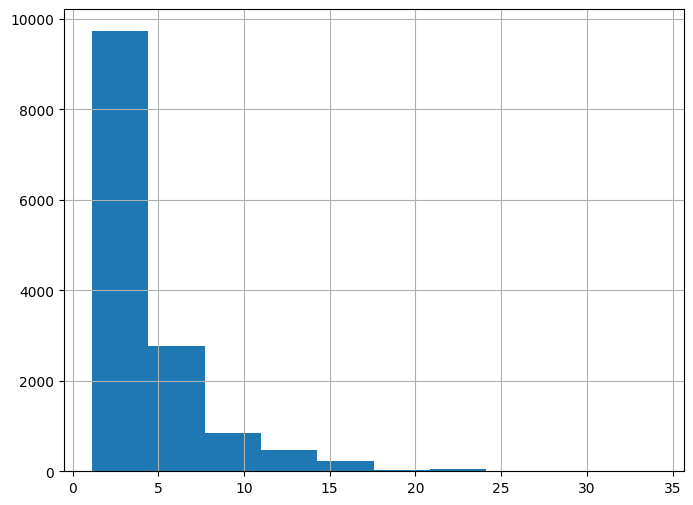

In [74]:
data.BSA.hist()

<Axes: >

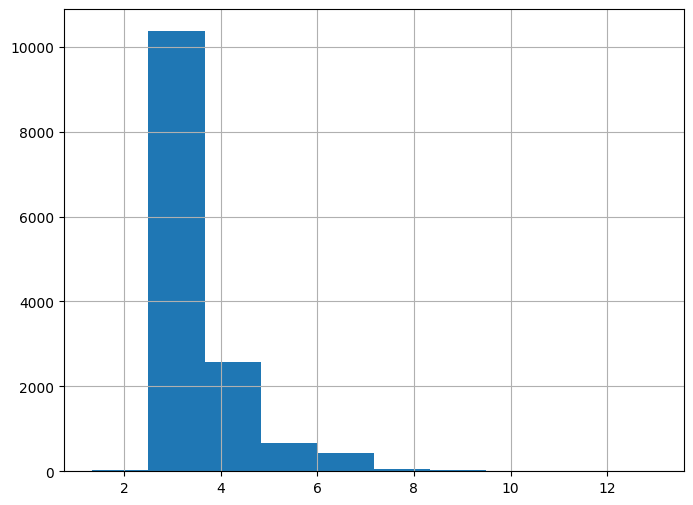

In [75]:
data.BSD.hist()

<Axes: >

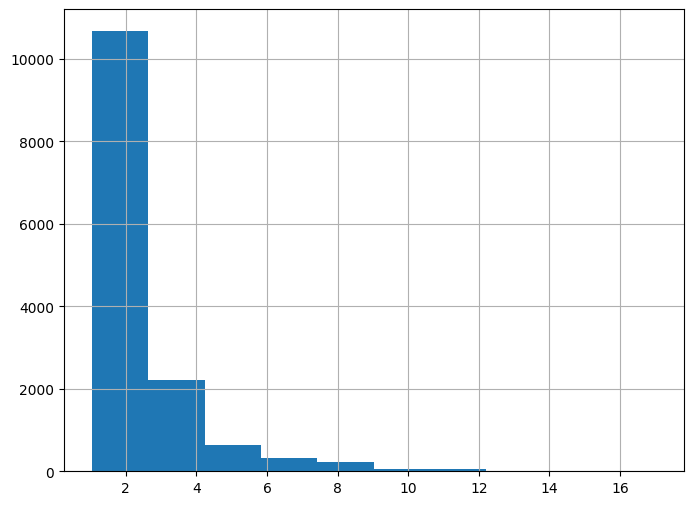

In [76]:
data.BSH.hist()

In [77]:
eod_value_B365A = data.B365A.mean() + 3*data.B365A.std()

eod_value_B365H = data.B365H.mean() + 3*data.B365H.std()

eod_value_B365D = data.B365D.mean() + 3*data.B365D.std()

eod_value_BSH = data.BSH.mean() + 3*data.BSH.std()

eod_value_BSD = data.BSD.mean() + 3*data.BSD.std()

eod_value_BSA = data.BSA.mean() + 3*data.BSA.std()

In [78]:
data['B365A'] = data.B365A.fillna(eod_value_B365A)

data['B365D'] = data.B365D.fillna(eod_value_B365D)

data['B365H'] = data.B365H.fillna(eod_value_B365H)

data['BSA'] = data.BSA.fillna(eod_value_BSA)

data['BSD'] = data.BSD.fillna(eod_value_BSD)

data['BSH'] = data.BSH.fillna(eod_value_BSH)

data.head(100)

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,B365H,B365D,B365A,BSH,BSD,BSA,diff_goals,target
0,24559,Switzerland,Switzerland Super League,2008/2009,1,2008-07-18 00:00:00,BSC Young Boys,FC Basel,1,2,8.012206,7.194491,15.852533,7.021272,6.265558,13.975105,-1,1
1,24560,Switzerland,Switzerland Super League,2008/2009,1,2008-07-19 00:00:00,FC Aarau,FC Sion,3,1,8.012206,7.194491,15.852533,7.021272,6.265558,13.975105,2,1
2,24561,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,FC Luzern,FC Vaduz,1,2,8.012206,7.194491,15.852533,7.021272,6.265558,13.975105,-1,1
3,24562,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,Neuchâtel Xamax,FC Zürich,1,2,8.012206,7.194491,15.852533,7.021272,6.265558,13.975105,-1,1
4,24613,Switzerland,Switzerland Super League,2008/2009,2,2008-07-23 00:00:00,FC Basel,Grasshopper Club Zürich,1,0,8.012206,7.194491,15.852533,7.021272,6.265558,13.975105,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4883,France,France Ligue 1,2008/2009,2,2008-08-17 00:00:00,Olympique de Marseille,AJ Auxerre,4,0,1.570000,3.600000,6.500000,1.570000,3.300000,6.000000,4,1
96,7813,Germany,Germany 1. Bundesliga,2008/2009,1,2008-08-17 00:00:00,Eintracht Frankfurt,Hertha BSC Berlin,0,2,2.350000,3.300000,3.000000,2.250000,3.250000,2.880000,-2,1
97,7816,Germany,Germany 1. Bundesliga,2008/2009,1,2008-08-17 00:00:00,Borussia Mönchengladbach,VfB Stuttgart,1,3,2.750000,3.300000,2.500000,2.620000,3.100000,2.500000,-2,1
98,15812,Poland,Poland Ekstraklasa,2008/2009,2,2008-08-17 00:00:00,Odra Wodzisław,Legia Warszawa,2,0,8.012206,7.194491,15.852533,7.021272,6.265558,13.975105,2,1


<Axes: ylabel='Density'>

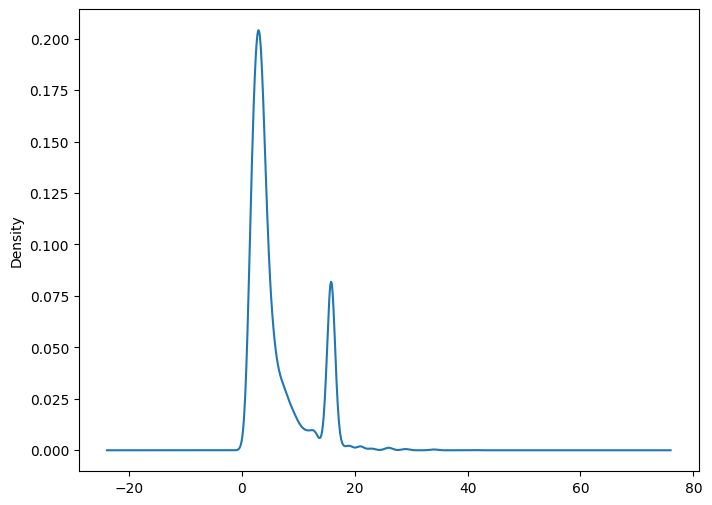

In [79]:
plt.rcParams["figure.figsize"] = [8,6]

fig = plt.figure()
ax = fig.add_subplot(111)

data['B365A'].plot(kind='kde', ax=ax)

<Axes: ylabel='Density'>

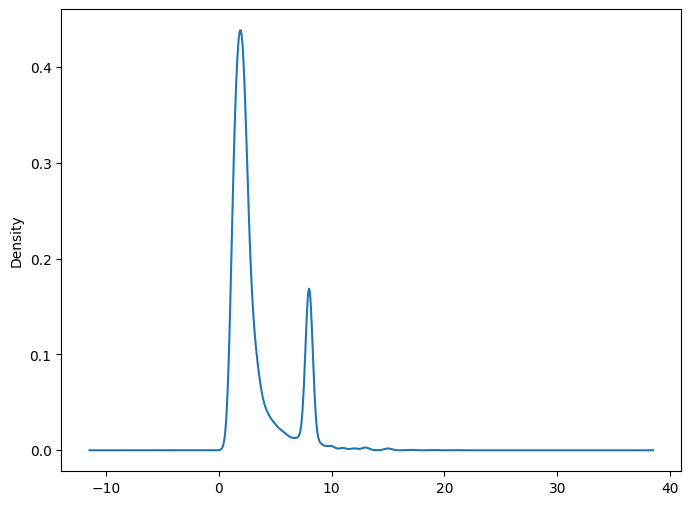

In [80]:

plt.rcParams["figure.figsize"] = [8,6]

fig = plt.figure()
ax = fig.add_subplot(111)

data['B365H'].plot(kind='kde', ax=ax)

<Axes: ylabel='Density'>

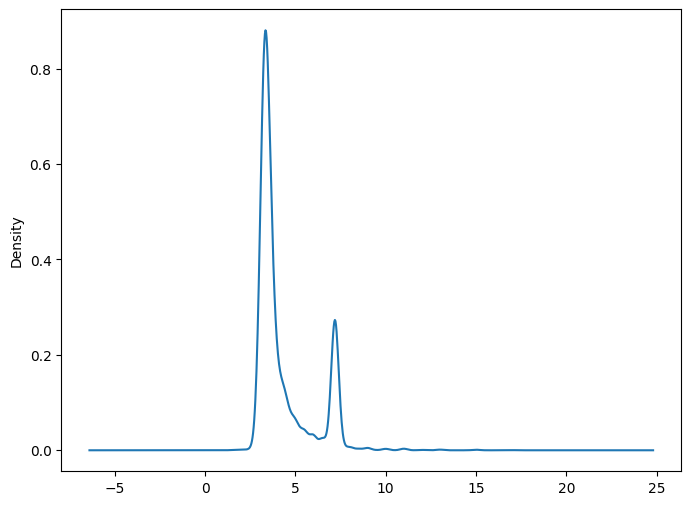

In [81]:

plt.rcParams["figure.figsize"] = [8,6]

fig = plt.figure()
ax = fig.add_subplot(111)

data['B365D'].plot(kind='kde', ax=ax)

<Axes: ylabel='Density'>

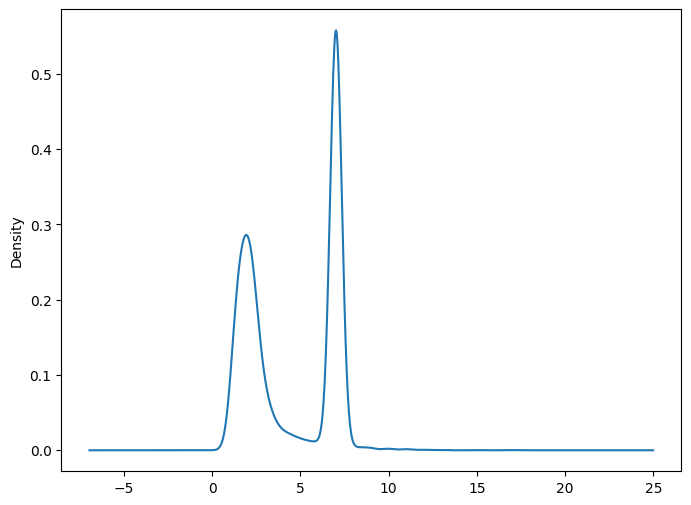

In [82]:

plt.rcParams["figure.figsize"] = [8,6]

fig = plt.figure()
ax = fig.add_subplot(111)

data['BSH'].plot(kind='kde', ax=ax)

<Axes: ylabel='Density'>

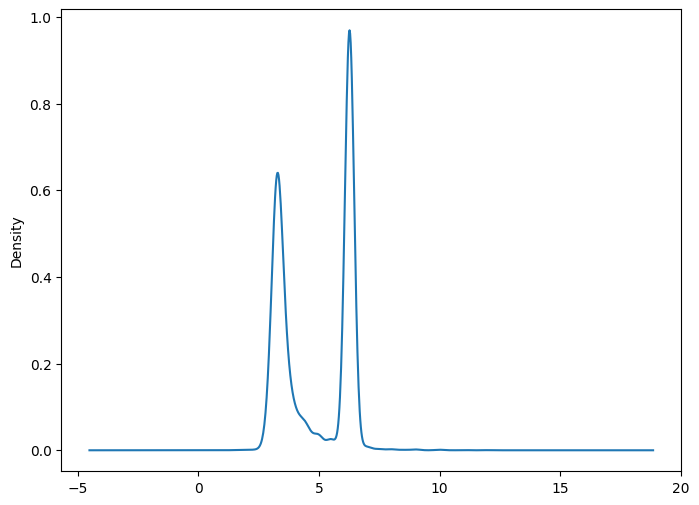

In [83]:

plt.rcParams["figure.figsize"] = [8,6]

fig = plt.figure()
ax = fig.add_subplot(111)

data['BSD'].plot(kind='kde', ax=ax)

<Axes: ylabel='Density'>

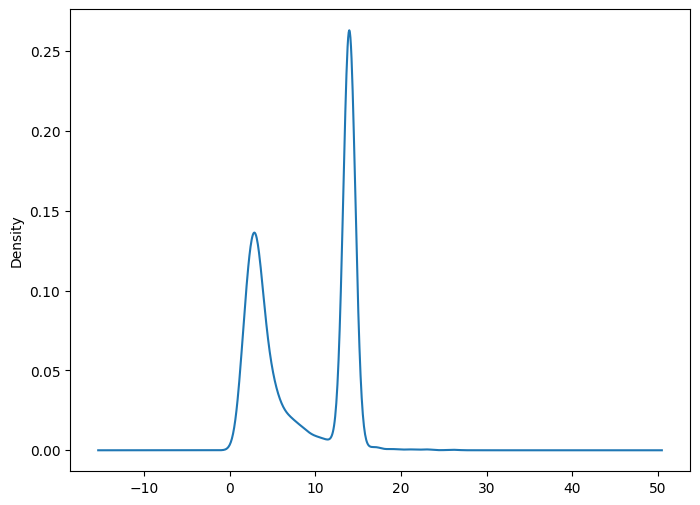

In [84]:

plt.rcParams["figure.figsize"] = [8,6]

fig = plt.figure()
ax = fig.add_subplot(111)

data['BSA'].plot(kind='kde', ax=ax)

In [85]:
data.isnull().mean()

id                0.0
country_name      0.0
league_name       0.0
season            0.0
stage             0.0
date              0.0
home_team         0.0
away_team         0.0
home_team_goal    0.0
away_team_goal    0.0
B365H             0.0
B365D             0.0
B365A             0.0
BSH               0.0
BSD               0.0
BSA               0.0
diff_goals        0.0
target            0.0
dtype: float64

In [86]:
print(data['country_name'].unique())
print(data['league_name'].unique())

['Switzerland' 'Poland' 'France' 'Scotland' 'Germany' 'Belgium' 'England'
 'Portugal' 'Netherlands' 'Italy' 'Spain']
['Switzerland Super League' 'Poland Ekstraklasa' 'France Ligue 1'
 'Scotland Premier League' 'Germany 1. Bundesliga'
 'Belgium Jupiler League' 'England Premier League'
 'Portugal Liga ZON Sagres' 'Netherlands Eredivisie' 'Italy Serie A'
 'Spain LIGA BBVA']


In [87]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(data['country_name'])
data['country_name'] = le.transform(data['country_name'])

data.head(100)

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,B365H,B365D,B365A,BSH,BSD,BSA,diff_goals,target
0,24559,10,Switzerland Super League,2008/2009,1,2008-07-18 00:00:00,BSC Young Boys,FC Basel,1,2,8.012206,7.194491,15.852533,7.021272,6.265558,13.975105,-1,1
1,24560,10,Switzerland Super League,2008/2009,1,2008-07-19 00:00:00,FC Aarau,FC Sion,3,1,8.012206,7.194491,15.852533,7.021272,6.265558,13.975105,2,1
2,24561,10,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,FC Luzern,FC Vaduz,1,2,8.012206,7.194491,15.852533,7.021272,6.265558,13.975105,-1,1
3,24562,10,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,Neuchâtel Xamax,FC Zürich,1,2,8.012206,7.194491,15.852533,7.021272,6.265558,13.975105,-1,1
4,24613,10,Switzerland Super League,2008/2009,2,2008-07-23 00:00:00,FC Basel,Grasshopper Club Zürich,1,0,8.012206,7.194491,15.852533,7.021272,6.265558,13.975105,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4883,2,France Ligue 1,2008/2009,2,2008-08-17 00:00:00,Olympique de Marseille,AJ Auxerre,4,0,1.570000,3.600000,6.500000,1.570000,3.300000,6.000000,4,1
96,7813,3,Germany 1. Bundesliga,2008/2009,1,2008-08-17 00:00:00,Eintracht Frankfurt,Hertha BSC Berlin,0,2,2.350000,3.300000,3.000000,2.250000,3.250000,2.880000,-2,1
97,7816,3,Germany 1. Bundesliga,2008/2009,1,2008-08-17 00:00:00,Borussia Mönchengladbach,VfB Stuttgart,1,3,2.750000,3.300000,2.500000,2.620000,3.100000,2.500000,-2,1
98,15812,6,Poland Ekstraklasa,2008/2009,2,2008-08-17 00:00:00,Odra Wodzisław,Legia Warszawa,2,0,8.012206,7.194491,15.852533,7.021272,6.265558,13.975105,2,1


In [88]:
le.fit(data['league_name'])
data['league_name'] = le.transform(data['league_name'])

data.head(100)

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,B365H,B365D,B365A,BSH,BSD,BSA,diff_goals,target
0,24559,10,10,2008/2009,1,2008-07-18 00:00:00,BSC Young Boys,FC Basel,1,2,8.012206,7.194491,15.852533,7.021272,6.265558,13.975105,-1,1
1,24560,10,10,2008/2009,1,2008-07-19 00:00:00,FC Aarau,FC Sion,3,1,8.012206,7.194491,15.852533,7.021272,6.265558,13.975105,2,1
2,24561,10,10,2008/2009,1,2008-07-20 00:00:00,FC Luzern,FC Vaduz,1,2,8.012206,7.194491,15.852533,7.021272,6.265558,13.975105,-1,1
3,24562,10,10,2008/2009,1,2008-07-20 00:00:00,Neuchâtel Xamax,FC Zürich,1,2,8.012206,7.194491,15.852533,7.021272,6.265558,13.975105,-1,1
4,24613,10,10,2008/2009,2,2008-07-23 00:00:00,FC Basel,Grasshopper Club Zürich,1,0,8.012206,7.194491,15.852533,7.021272,6.265558,13.975105,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4883,2,2,2008/2009,2,2008-08-17 00:00:00,Olympique de Marseille,AJ Auxerre,4,0,1.570000,3.600000,6.500000,1.570000,3.300000,6.000000,4,1
96,7813,3,3,2008/2009,1,2008-08-17 00:00:00,Eintracht Frankfurt,Hertha BSC Berlin,0,2,2.350000,3.300000,3.000000,2.250000,3.250000,2.880000,-2,1
97,7816,3,3,2008/2009,1,2008-08-17 00:00:00,Borussia Mönchengladbach,VfB Stuttgart,1,3,2.750000,3.300000,2.500000,2.620000,3.100000,2.500000,-2,1
98,15812,6,6,2008/2009,2,2008-08-17 00:00:00,Odra Wodzisław,Legia Warszawa,2,0,8.012206,7.194491,15.852533,7.021272,6.265558,13.975105,2,1


In [89]:
le.fit(data['home_team'])
data['home_team'] = le.transform(data['home_team'])

le.fit(data['away_team'])
data['away_team'] = le.transform(data['away_team'])

data.head(100)

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,B365H,B365D,B365A,BSH,BSD,BSA,diff_goals,target
0,24559,10,10,2008/2009,1,2008-07-18 00:00:00,24,76,1,2,8.012206,7.194491,15.852533,7.021272,6.265558,13.975105,-1,1
1,24560,10,10,2008/2009,1,2008-07-19 00:00:00,72,91,3,1,8.012206,7.194491,15.852533,7.021272,6.265558,13.975105,2,1
2,24561,10,10,2008/2009,1,2008-07-20 00:00:00,84,98,1,2,8.012206,7.194491,15.852533,7.021272,6.265558,13.975105,-1,1
3,24562,10,10,2008/2009,1,2008-07-20 00:00:00,173,100,1,2,8.012206,7.194491,15.852533,7.021272,6.265558,13.975105,-1,1
4,24613,10,10,2008/2009,2,2008-07-23 00:00:00,76,117,1,0,8.012206,7.194491,15.852533,7.021272,6.265558,13.975105,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4883,2,2,2008/2009,2,2008-08-17 00:00:00,180,8,4,0,1.570000,3.600000,6.500000,1.570000,3.300000,6.000000,4,1
96,7813,3,3,2008/2009,1,2008-08-17 00:00:00,65,126,0,2,2.350000,3.300000,3.000000,2.250000,3.250000,2.880000,-2,1
97,7816,3,3,2008/2009,1,2008-08-17 00:00:00,35,275,1,3,2.750000,3.300000,2.500000,2.620000,3.100000,2.500000,-2,1
98,15812,6,6,2008/2009,2,2008-08-17 00:00:00,178,153,2,0,8.012206,7.194491,15.852533,7.021272,6.265558,13.975105,2,1


<Axes: ylabel='B365H'>

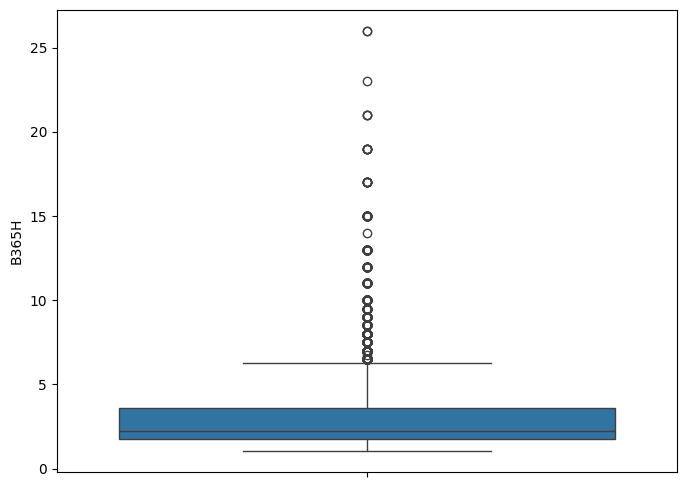

In [90]:
sns.boxplot( y='B365H', data=data)

In [91]:
IQR1 = data["B365H"].quantile(0.75) - data["B365H"].quantile(0.25)

lower_B365H_limit = data["B365H"].quantile(0.25) - (IQR1 * 1.5)
upper_B365H_limit = data["B365H"].quantile(0.75) + (IQR1 * 1.5)

print(lower_B365H_limit)
print(upper_B365H_limit)

-1.0250000000000004
6.375


In [92]:
data["B365H"]= np.where(data["B365H"] > upper_B365H_limit, upper_B365H_limit,
            np.where(data["B365H"] < lower_B365H_limit, lower_B365H_limit, data["B365H"]))



<Axes: ylabel='B365H'>

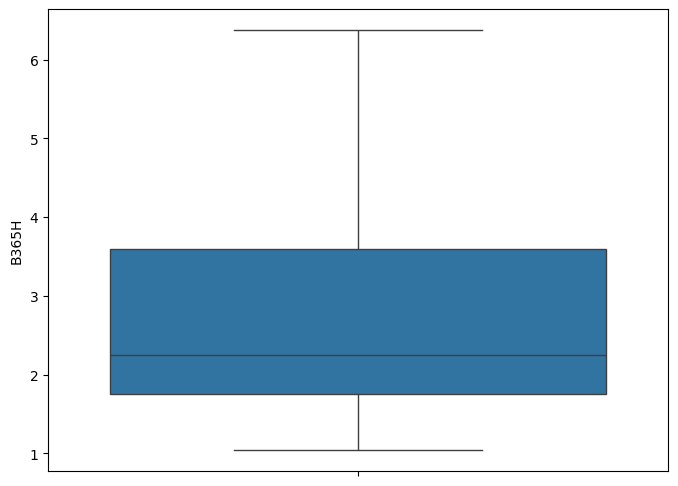

In [93]:
sns.boxplot( y='B365H', data=data)

<Axes: ylabel='B365A'>

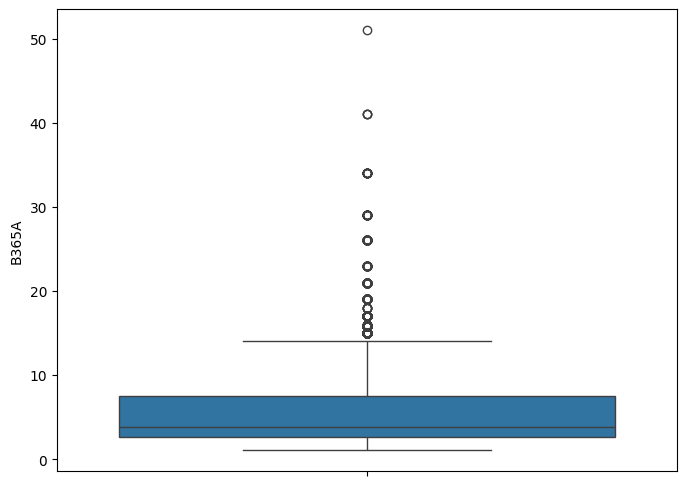

In [94]:
sns.boxplot( y='B365A', data=data)

In [95]:
IQR2 = data["B365A"].quantile(0.75) - data["B365A"].quantile(0.25)

lower_B365A_limit = data["B365A"].quantile(0.25) - (IQR2 * 1.5)
upper_B365A_limit = data["B365A"].quantile(0.75) + (IQR2 * 1.5)

print(lower_B365A_limit)
print(upper_B365A_limit)

-4.499999999999999
14.7


In [96]:
data["B365A"]= np.where(data["B365A"] > upper_B365A_limit, upper_B365A_limit,
            np.where(data["B365A"] < lower_B365A_limit, lower_B365A_limit, data["B365A"]))



<Axes: ylabel='B365A'>

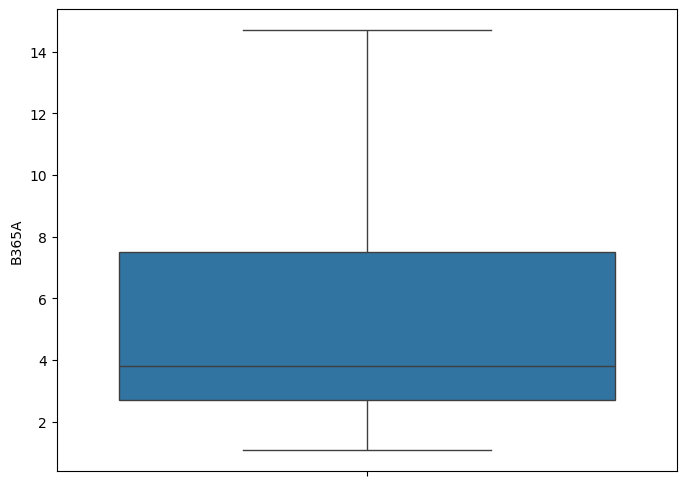

In [97]:
sns.boxplot( y='B365A', data=data)

<Axes: ylabel='B365D'>

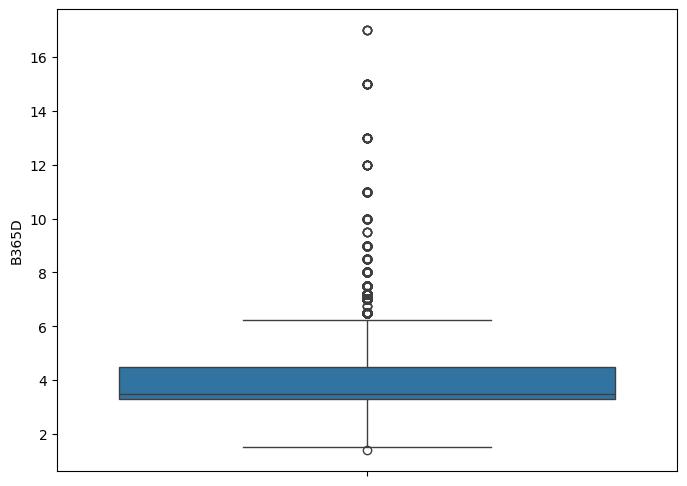

In [98]:
sns.boxplot( y='B365D', data=data)

In [99]:
IQR3 = data["B365D"].quantile(0.75) - data["B365D"].quantile(0.25)

lower_B365D_limit = data["B365D"].quantile(0.25) - (IQR3 * 1.5)
upper_B365D_limit = data["B365D"].quantile(0.75) + (IQR3 * 1.5)

print(lower_B365D_limit)
print(upper_B365D_limit)

1.4999999999999996
6.300000000000001


In [100]:
data["B365D"]= np.where(data["B365D"] > upper_B365D_limit, upper_B365D_limit,
            np.where(data["B365D"] < lower_B365D_limit, lower_B365D_limit, data["B365D"]))



<Axes: ylabel='B365D'>

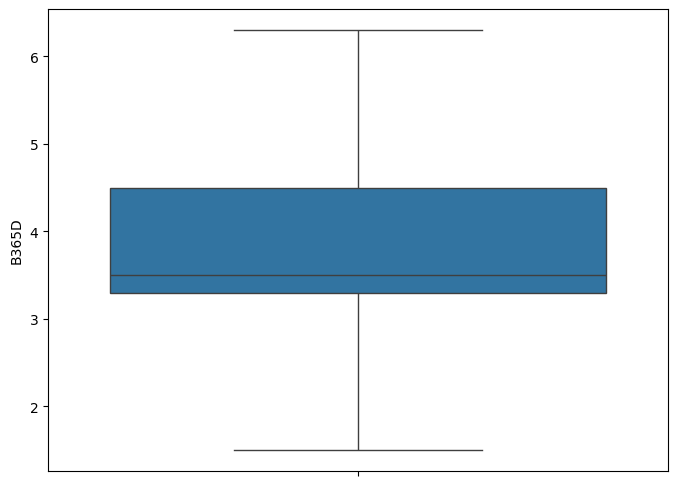

In [101]:
sns.boxplot( y='B365D', data=data)

<Axes: ylabel='BSH'>

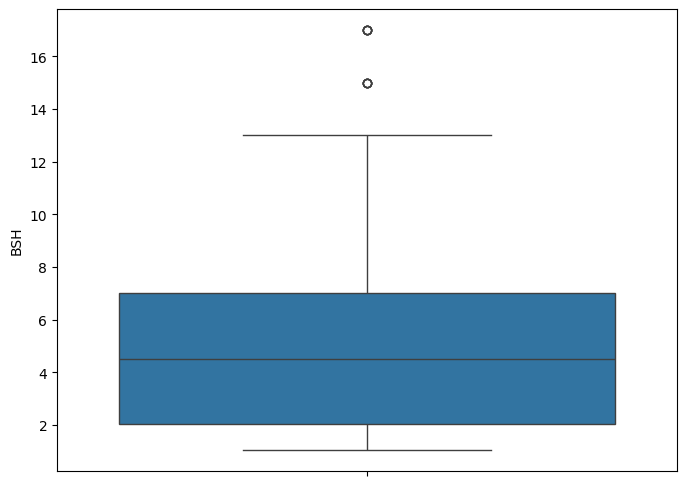

In [102]:
sns.boxplot( y='BSH', data=data)

In [103]:
IQR4 = data["BSH"].quantile(0.75) - data["BSH"].quantile(0.25)

lower_BSH_limit = data["BSH"].quantile(0.25) - (IQR4 * 1.5)
upper_BSH_limit = data["BSH"].quantile(0.75) + (IQR4 * 1.5)

print(lower_BSH_limit)
print(upper_BSH_limit)

-5.406907655601594
14.478179426002656


In [104]:
data["BSH"]= np.where(data["BSH"] > upper_BSH_limit, upper_BSH_limit,
            np.where(data["BSH"] < lower_BSH_limit, lower_BSH_limit, data["BSH"]))



<Axes: ylabel='BSH'>

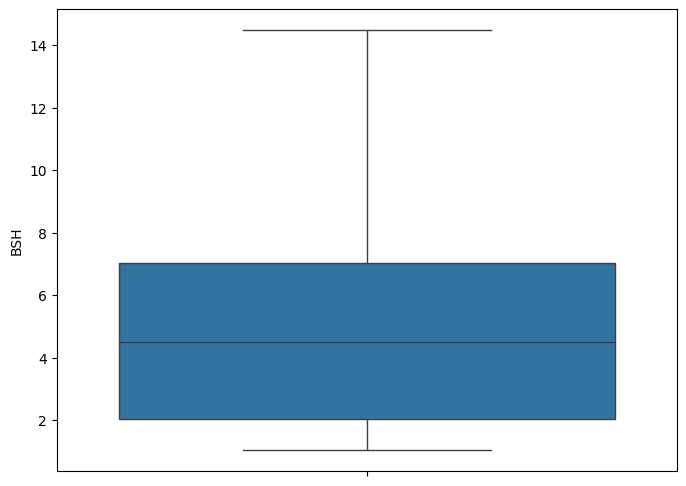

In [105]:
sns.boxplot( y='BSH', data=data)

<Axes: ylabel='BSD'>

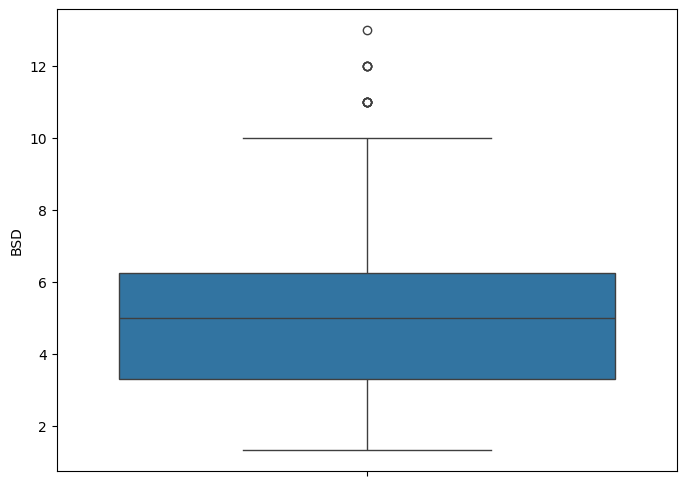

In [106]:
sns.boxplot( y='BSD', data=data)

In [107]:
IQR5 = data["BSD"].quantile(0.75) - data["BSD"].quantile(0.25)

lower_BSD_limit = data["BSD"].quantile(0.25) - (IQR5 * 1.5)
upper_BSD_limit = data["BSD"].quantile(0.75) + (IQR5 * 1.5)

print(lower_BSD_limit)
print(upper_BSD_limit)

-1.148336934552816
10.71389489092136


In [108]:
data["BSD"]= np.where(data["BSD"] > upper_BSD_limit, upper_BSD_limit,
            np.where(data["BSD"] < lower_BSD_limit, lower_BSD_limit, data["BSD"]))



<Axes: ylabel='BSD'>

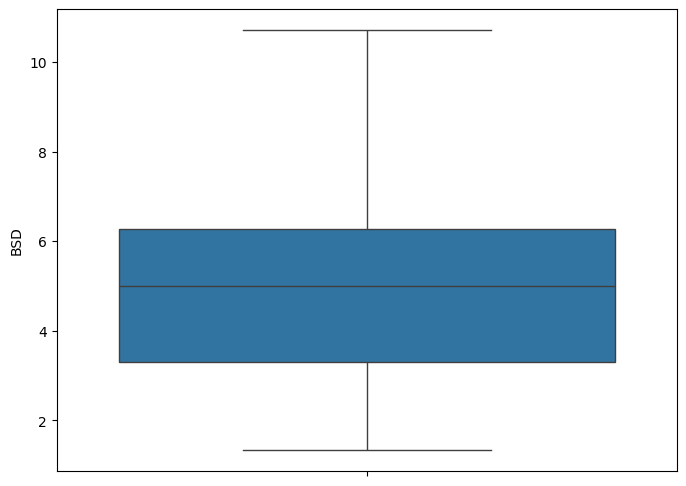

In [109]:
sns.boxplot( y='BSD', data=data)

<Axes: ylabel='BSA'>

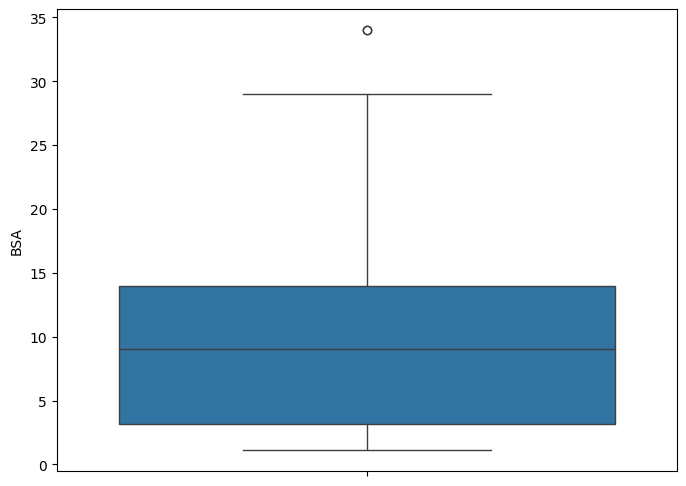

In [110]:
sns.boxplot( y='BSA', data=data)

In [111]:
IQR6 = data["BSA"].quantile(0.75) - data["BSA"].quantile(0.25)

lower_BSA_limit = data["BSA"].quantile(0.25) - (IQR6 * 1.5)
upper_BSA_limit = data["BSA"].quantile(0.75) + (IQR6 * 1.5)

print(lower_BSA_limit)
print(upper_BSA_limit)

-12.96265690945459
30.137761515757653


In [112]:
data["BSA"]= np.where(data["BSA"] > upper_BSA_limit, upper_BSA_limit,
            np.where(data["BSA"] < lower_BSA_limit, lower_BSA_limit, data["BSA"]))



<Axes: ylabel='BSA'>

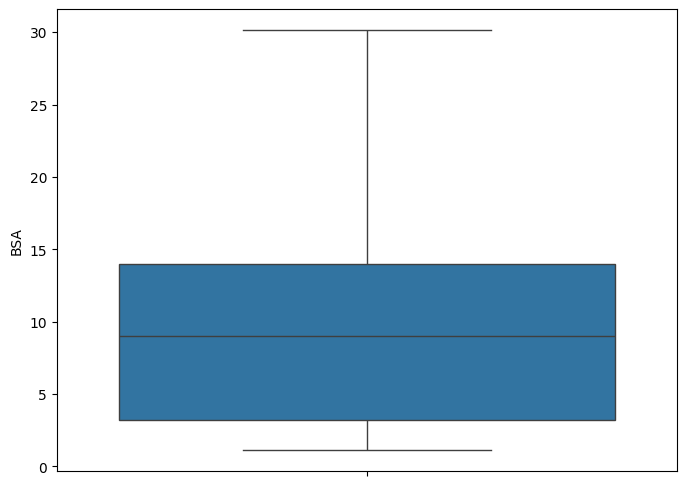

In [113]:
sns.boxplot( y='BSA', data=data)

In [114]:
data['date'] = pd.to_datetime(data['date'])

In [115]:
data['hour'] = data['date'].dt.hour
data['min'] = data['date'].dt.minute
data['second'] = data['date'].dt.second

In [116]:
data['date'].dt.isocalendar()
data['month'] = data['date'].dt.month
data['day_month'] = data['date'].dt.day
data['year']= data['date'].dt.year
data.drop(columns=['date'], inplace=True)

In [117]:
data.head()

,id,country_name,league_name,season,stage,home_team,away_team,home_team_goal,away_team_goal,B365H,...,BSD,BSA,diff_goals,target,hour,min,second,month,day_month,year
0,24559,10,10,2008/2009,1,24,76,1,2,6.375,...,6.265558,13.975105,-1,1,0,0,0,7,18,2008
1,24560,10,10,2008/2009,1,72,91,3,1,6.375,...,6.265558,13.975105,2,1,0,0,0,7,19,2008
2,24561,10,10,2008/2009,1,84,98,1,2,6.375,...,6.265558,13.975105,-1,1,0,0,0,7,20,2008
3,24562,10,10,2008/2009,1,173,100,1,2,6.375,...,6.265558,13.975105,-1,1,0,0,0,7,20,2008
4,24613,10,10,2008/2009,2,76,117,1,0,6.375,...,6.265558,13.975105,1,1,0,0,0,7,23,2008


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              25979 non-null  int64  
 1   country_name    25979 non-null  int32  
 2   league_name     25979 non-null  int32  
 3   season          25979 non-null  object 
 4   stage           25979 non-null  int64  
 5   home_team       25979 non-null  int32  
 6   away_team       25979 non-null  int32  
 7   home_team_goal  25979 non-null  int64  
 8   away_team_goal  25979 non-null  int64  
 9   B365H           25979 non-null  float64
 10  B365D           25979 non-null  float64
 11  B365A           25979 non-null  float64
 12  BSH             25979 non-null  float64
 13  BSD             25979 non-null  float64
 14  BSA             25979 non-null  float64
 15  diff_goals      25979 non-null  int64  
 16  target          25979 non-null  int64  
 17  hour            25979 non-null 

In [119]:
data['season'] = data['season'].astype(str)
data[['start', 'end']] = data['season'].str.split('/', expand=True)
data['start_season'] = pd.to_numeric(data['start'])
data['end_season'] = pd.to_numeric(data['end'])
data.drop(columns=['season'], inplace=True)

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              25979 non-null  int64  
 1   country_name    25979 non-null  int32  
 2   league_name     25979 non-null  int32  
 3   stage           25979 non-null  int64  
 4   home_team       25979 non-null  int32  
 5   away_team       25979 non-null  int32  
 6   home_team_goal  25979 non-null  int64  
 7   away_team_goal  25979 non-null  int64  
 8   B365H           25979 non-null  float64
 9   B365D           25979 non-null  float64
 10  B365A           25979 non-null  float64
 11  BSH             25979 non-null  float64
 12  BSD             25979 non-null  float64
 13  BSA             25979 non-null  float64
 14  diff_goals      25979 non-null  int64  
 15  target          25979 non-null  int64  
 16  hour            25979 non-null  int32  
 17  min             25979 non-null 

<Axes: xlabel='target', ylabel='count'>

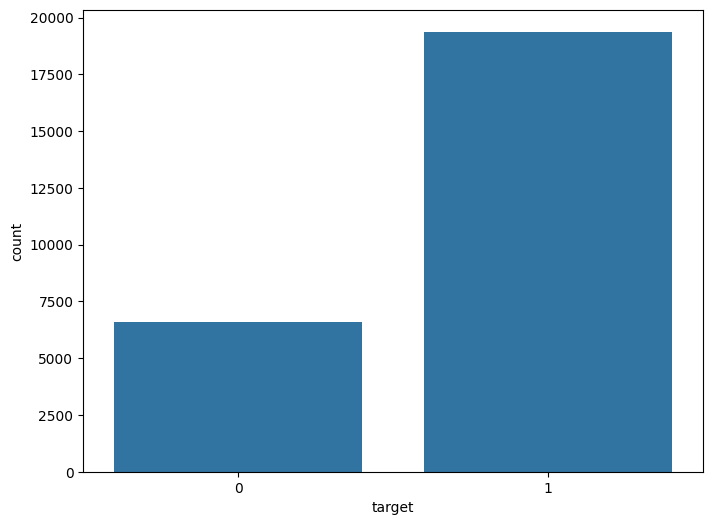

In [121]:
sns.countplot(x='target',data=data)

In [122]:
target_true = data[data["target"] == 1]
target_false = data[data["target"] == 0]
print(target_true.shape)
print(target_false.shape)

(19383, 26)
(6596, 26)


In [123]:
target_true

,id,country_name,league_name,stage,home_team,away_team,home_team_goal,away_team_goal,B365H,B365D,...,hour,min,second,month,day_month,year,start,end,start_season,end_season
0,24559,10,10,1,24,76,1,2,6.375,6.3,...,0,0,0,7,18,2008,2008,2009,2008,2009
1,24560,10,10,1,72,91,3,1,6.375,6.3,...,0,0,0,7,19,2008,2008,2009,2008,2009
2,24561,10,10,1,84,98,1,2,6.375,6.3,...,0,0,0,7,20,2008,2008,2009,2008,2009
3,24562,10,10,1,173,100,1,2,6.375,6.3,...,0,0,0,7,20,2008,2008,2009,2008,2009
4,24613,10,10,2,76,117,1,0,6.375,6.3,...,0,0,0,7,23,2008,2008,2009,2008,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25973,25944,10,10,35,93,84,1,4,6.375,6.3,...,0,0,0,5,22,2016,2015,2016,2015,2016
25974,25945,10,10,36,76,117,0,1,6.375,6.3,...,0,0,0,5,25,2016,2015,2016,2015,2016
25975,25946,10,10,36,160,93,3,0,6.375,6.3,...,0,0,0,5,25,2016,2015,2016,2015,2016
25977,25948,10,10,36,95,24,0,3,6.375,6.3,...,0,0,0,5,25,2016,2015,2016,2015,2016


In [124]:
from sklearn.utils import resample
target_falseds = resample(target_false,
             replace=True, 
             n_samples=len(target_true), 
             random_state=27)

In [125]:
target_falseds.shape

(19383, 26)

In [126]:
target_downsampled = pd.concat([target_true, target_falseds])

<Axes: xlabel='target', ylabel='count'>

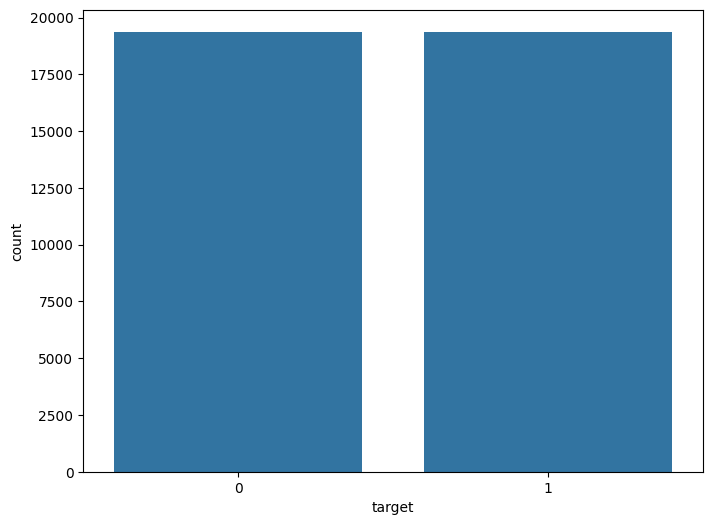

In [127]:
sns.countplot(x='target', data=target_downsampled)

In [132]:
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X

,id,country_name,league_name,stage,home_team,away_team,home_team_goal,away_team_goal,B365H,B365D,...,hour,min,second,month,day_month,year,start,end,start_season,end_season
0,24559,10,10,1,24,76,1,2,6.375,6.3,...,0,0,0,7,18,2008,2008,2009,2008,2009
1,24560,10,10,1,72,91,3,1,6.375,6.3,...,0,0,0,7,19,2008,2008,2009,2008,2009
2,24561,10,10,1,84,98,1,2,6.375,6.3,...,0,0,0,7,20,2008,2008,2009,2008,2009
3,24562,10,10,1,173,100,1,2,6.375,6.3,...,0,0,0,7,20,2008,2008,2009,2008,2009
4,24613,10,10,2,76,117,1,0,6.375,6.3,...,0,0,0,7,23,2008,2008,2009,2008,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25945,10,10,36,76,117,0,1,6.375,6.3,...,0,0,0,5,25,2016,2015,2016,2015,2016
25975,25946,10,10,36,160,93,3,0,6.375,6.3,...,0,0,0,5,25,2016,2015,2016,2015,2016
25976,25947,10,10,36,84,91,2,2,6.375,6.3,...,0,0,0,5,25,2016,2015,2016,2015,2016
25977,25948,10,10,36,95,24,0,3,6.375,6.3,...,0,0,0,5,25,2016,2015,2016,2015,2016


In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [130]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20783, 25)
(5196, 25)
(20783,)
(5196,)


In [136]:
# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.76
